# Sentiment Analysis menggunakan SVM (versi berbeda)

In [3]:


import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to C:\Users\BADRU AL
[nltk_data]     HUSAENI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Load data

In [4]:

df = pd.read_csv("Training.txt", sep="\t", header=None, names=["label", "text"])

# 2. Preprocessing dengan stopword removal

In [5]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# 3. Split data

In [6]:
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Pipeline dengan CountVectorizer dan TruncatedSVD

In [7]:
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2), stop_words='english')),
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 5. Train model

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('svd', TruncatedSVD(n_components=100)), ('clf', SVC())])

# 6. Evaluasi

In [9]:
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       567
           1       0.99      0.99      0.99       820

    accuracy                           0.98      1387
   macro avg       0.98      0.98      0.98      1387
weighted avg       0.98      0.98      0.98      1387

Confusion Matrix:
 [[555  12]
 [  9 811]]
F1 Score: 0.9848531512523473


# 7. Visualisasi confusion matrix

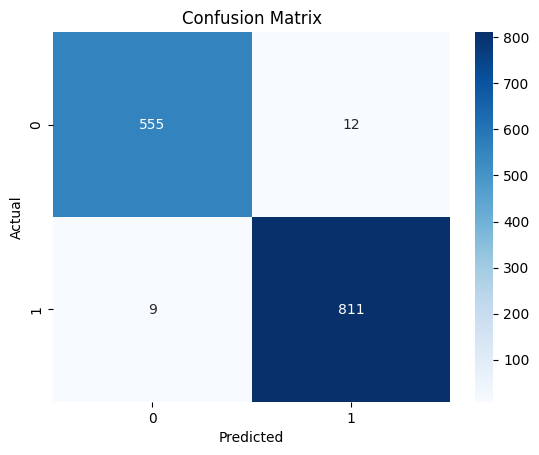

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()